<a href="https://colab.research.google.com/github/hgabrali/Masterschool-Math-Foundation/blob/main/Probability_%26_Statistics_for_ML_%26_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊+🧠 **Probability & Statistics for Machine Learning & Data Science**

## 🧮+💻+🎲+📈 Coursera_ML_Four Birthday Problems



In [ ]:
!pip install utils
# Veya eğer projeye özel bir paket ise:
# !pip install paket_adi

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=0f2488900837220a8c8af419a785581df3952228c783c5267a663a703b0d453e
  Stored in directory: /root/.cache/pip/wheels/b6/a1/81/1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Projeye özel utils dosyasını tekrar import etmeyi deneyin.
import utils
import utils

# Görselleştirme arka ucu: En yaygın ve sorunsuz olan.
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Eğer lab çalışmasında kullanılan özel bir paket varsa (utils hariç, o sizin dosyanızdır)
!pip install --upgrade pandas numpy scikit-learn

# Ya da lab'in gerektirdiği spesifik bir paket varsa:
# !pip install özel_paket_adı

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 98.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


In [ ]:
import os
# 'Coursera_ML_Proje' yerine kendi klasör adınızı yazın
project_path = '/content/drive/MyDrive/Coursera_ML_Proje_2025_Math'
os.chdir(project_path)

# Kontrol etmek için:
print(os.getcwd())

/content/drive/MyDrive/Coursera_ML_Proje_2025_Math


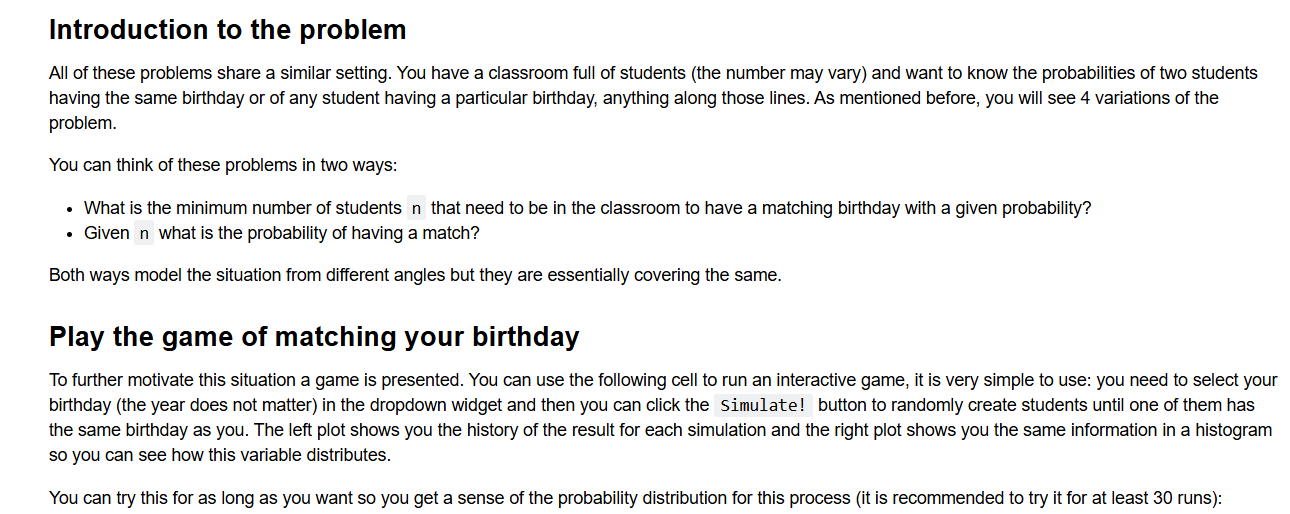



DatePicker(value=None, description='Pick your bday', style=DescriptionStyle(description_width='initial'))

Button(description='Simulate!', style=ButtonStyle())

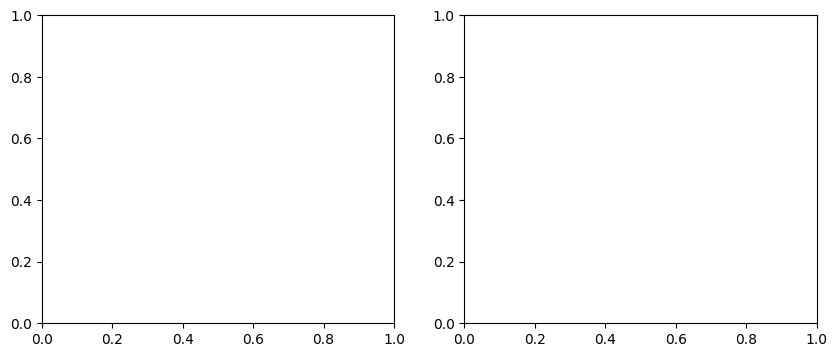

In [ ]:
game = utils.your_bday()

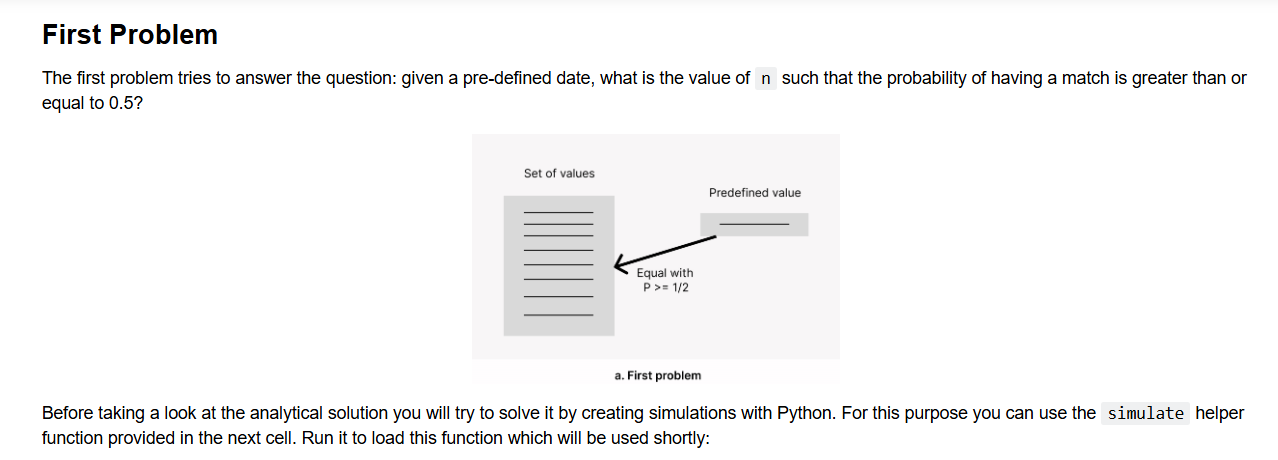

In [ ]:
def simulate(problem_func, n_students=365, n_simulations=1000):

    # Initialize the counter of matches at 0
    matches = 0

    # Run the simulation for the desired number of times
    for _ in range(n_simulations):

        # If there is a match in the classroom add 1 to the counter of matches
        if problem_func(n_students):
            matches += 1

    # Return the ratio of number of matches / number of simulations
    return matches/n_simulations

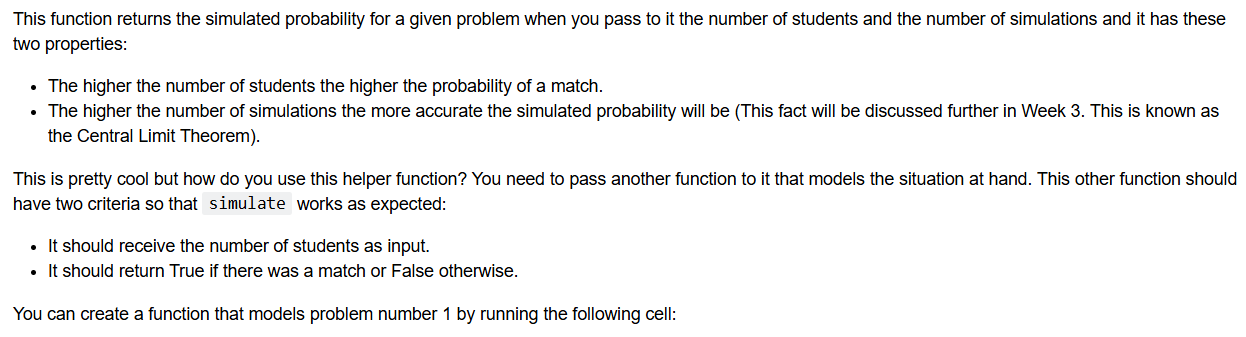

In [ ]:
def problem_1(n_students):

    # Predefine a specific birthday
    predef_bday = np.random.randint(0, 365)

    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))

    # Check if predefined bday is among students
    return predef_bday in gen_bdays

Now you can use these two functions in conjuction to get the probability of a match for a given classroom size. Notice that you can tweak the value of the n variable to simulate classrooms with different number of students. Also notice that this time the simulation is run 10,000 times instead of the default 1000. This gives you a more accurate simulated probability at the expense of taking longer to execute:

In [ ]:
n = 100 # try changing this value!
simulated_prob = simulate(problem_1, n_students=n, n_simulations=10_000)

print(f"The simulated probability of any student to have a bday equal to a predefined value is {simulated_prob} in a classroom with {n} students")

The simulated probability of any student to have a bday equal to a predefined value is 0.2476 in a classroom with 100 students


This is very cool but it still has one major drawback: you would need to try a bunch of values for n before arriving at the solution. Instead of taking this approach you can generate a plot that shows the simulated probability as a function of the number of students in the classroom:

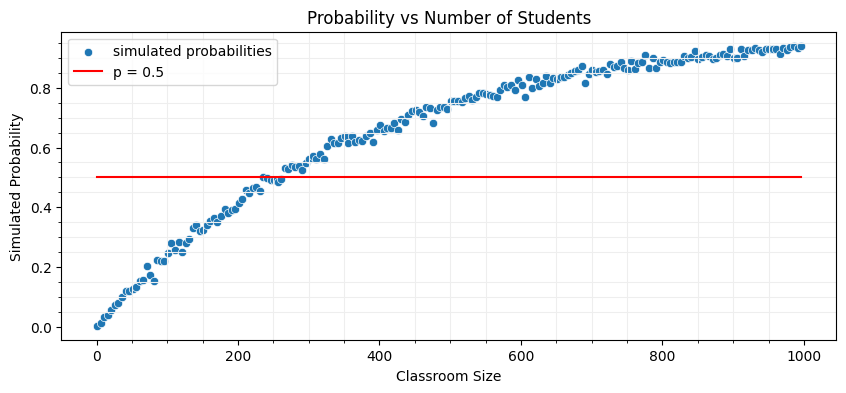

In [ ]:
# Generate the simulated probability for every classroom
simulated_probs_1 = [simulate(problem_1, n_students=n) for n in utils.big_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_1, utils.big_classroom_sizes)

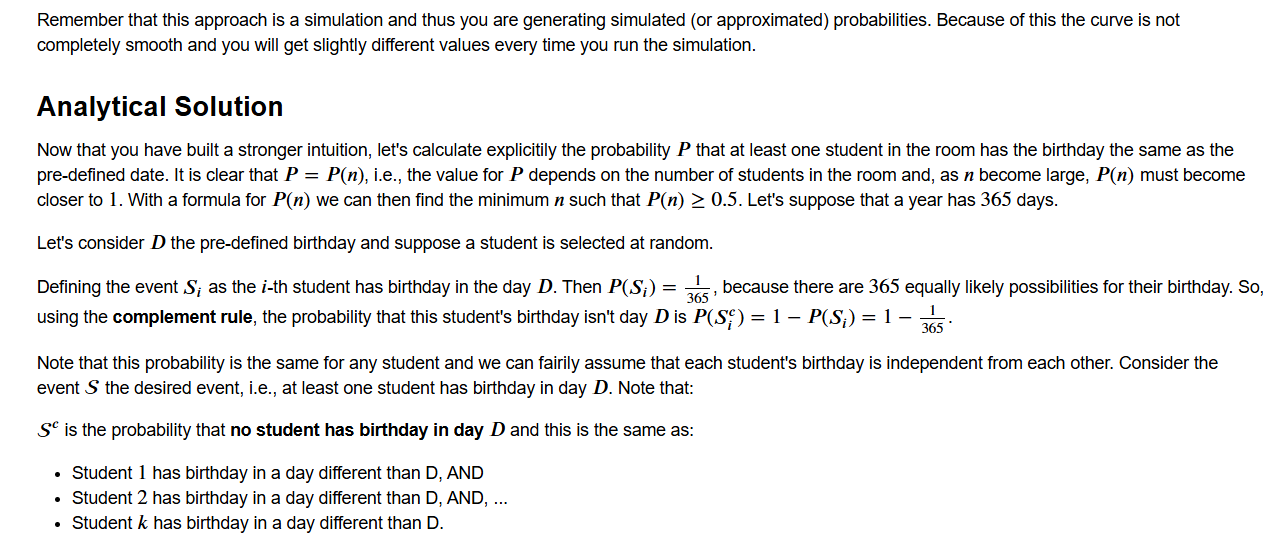

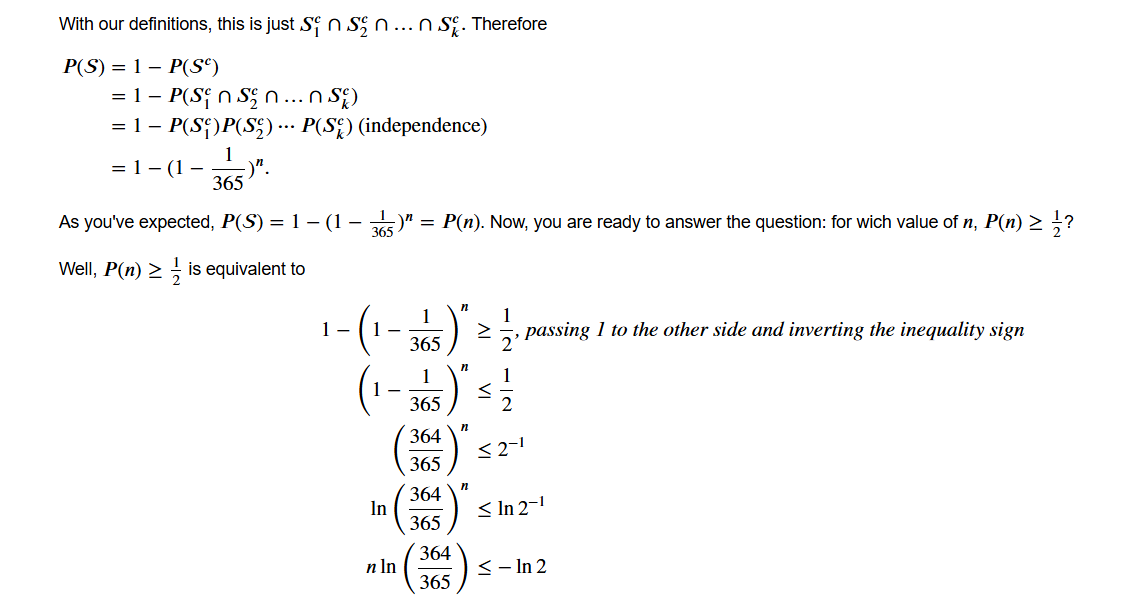

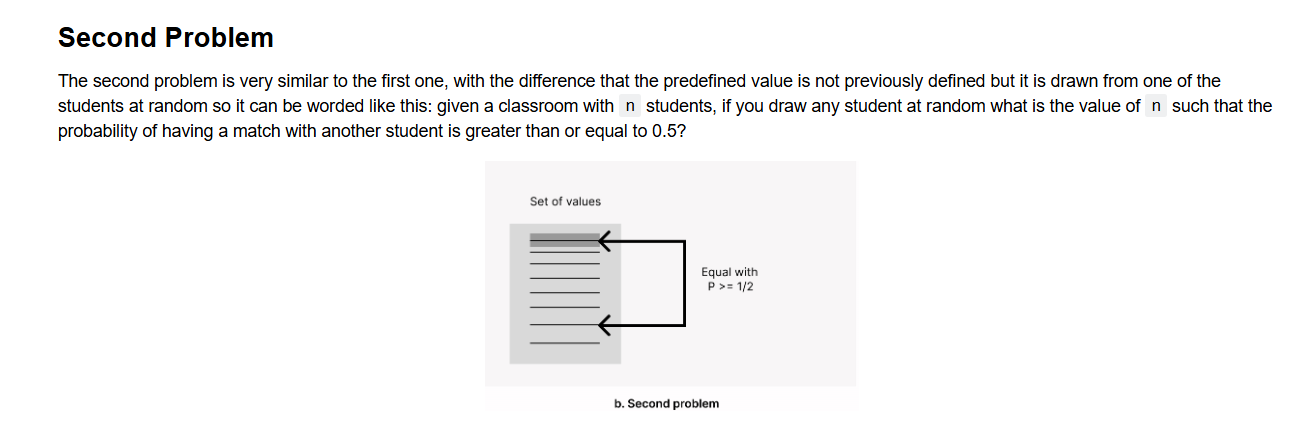

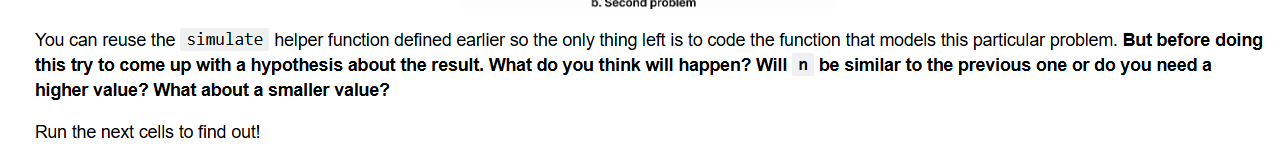

In [ ]:
def problem_2(n_students):

    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))

    # Pick one student at random
    rnd_index = np.random.randint(0, len(gen_bdays))

    # Get the bday from the selected student
    rnd_bday = gen_bdays[rnd_index]

    # Take the bday out of the pool of bdays (otherwise there is always a match)
    remaining_bdays = np.delete(gen_bdays, rnd_index, axis=0)

    # Check if another student shares the same bday
    return rnd_bday in remaining_bdays

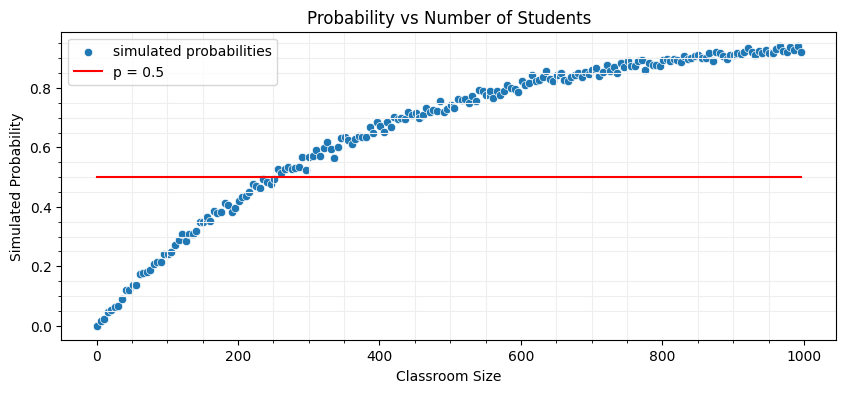

In [ ]:
# Generate the simulated probability for every classroom
simulated_probs_2 = [simulate(problem_2, n_students=n) for n in utils.big_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_2, utils.big_classroom_sizes)

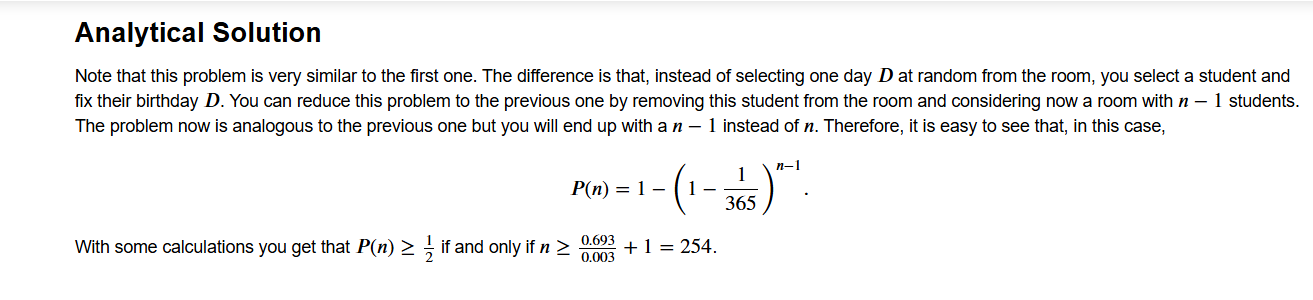

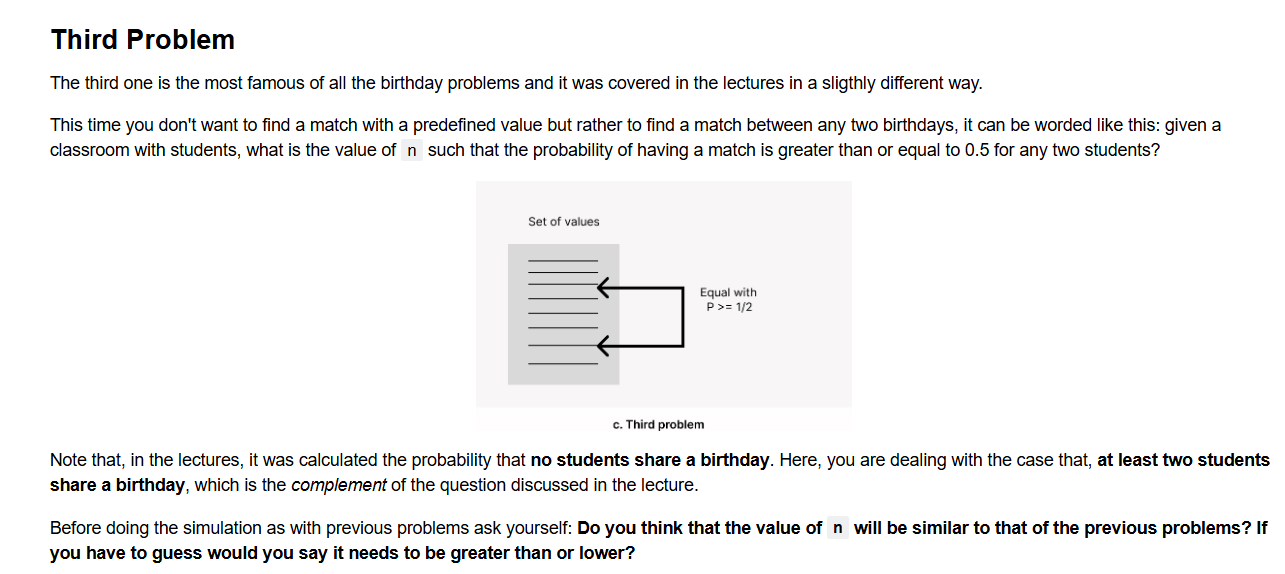

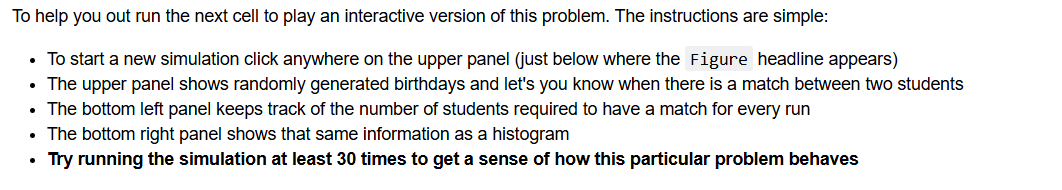

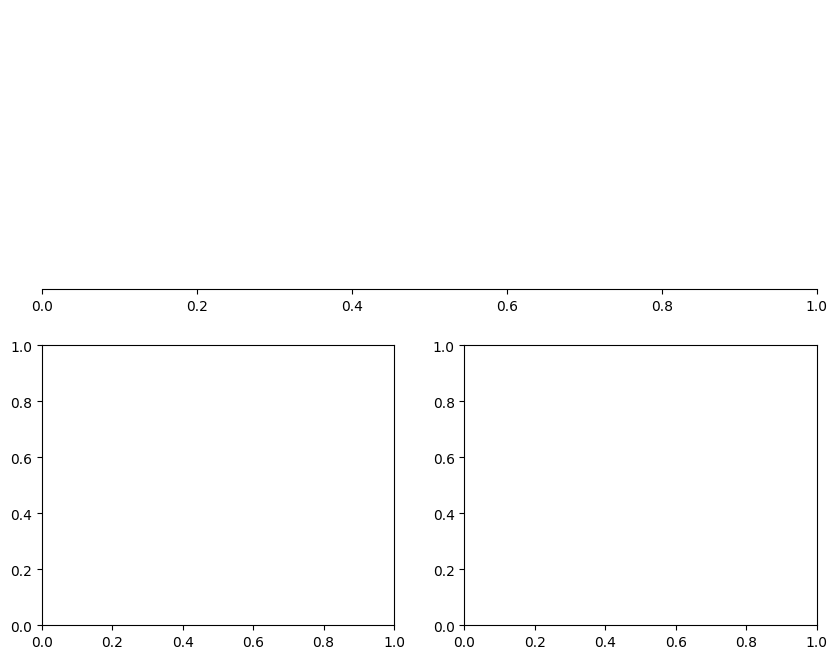

In [ ]:
game_third_prob = utils.third_bday_problem()

Now you should have a hypothesis of the number of students in the classroom needed for the match. Test your intuition by generating the simulated probabilities as before:

In [ ]:
def problem_3(n_students):

    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))

    # Get array containing unique bdays
    unique_bdays = np.array(list(set(gen_bdays)))

    # Check that both the original and unique arrays have the same length
    # (if so then no two students share the same bday)
    return len(unique_bdays) != len(gen_bdays)

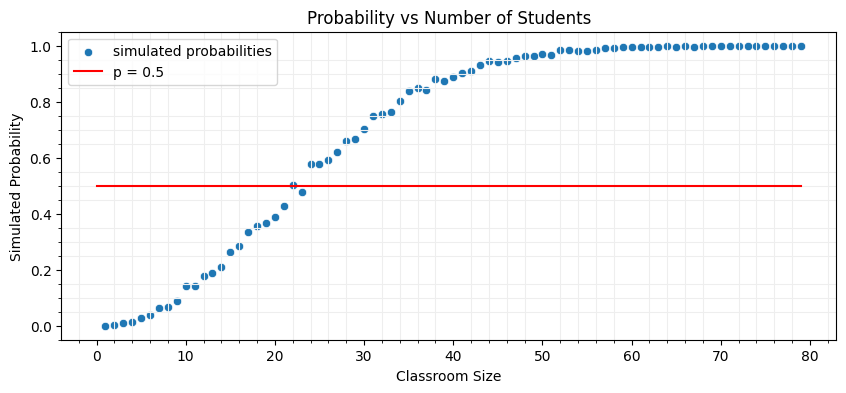

In [ ]:
# Generate the simulated probability for every classroom
simulated_probs_3 = [simulate(problem_3, n_students=n) for n in utils.small_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_3, utils.small_classroom_sizes)

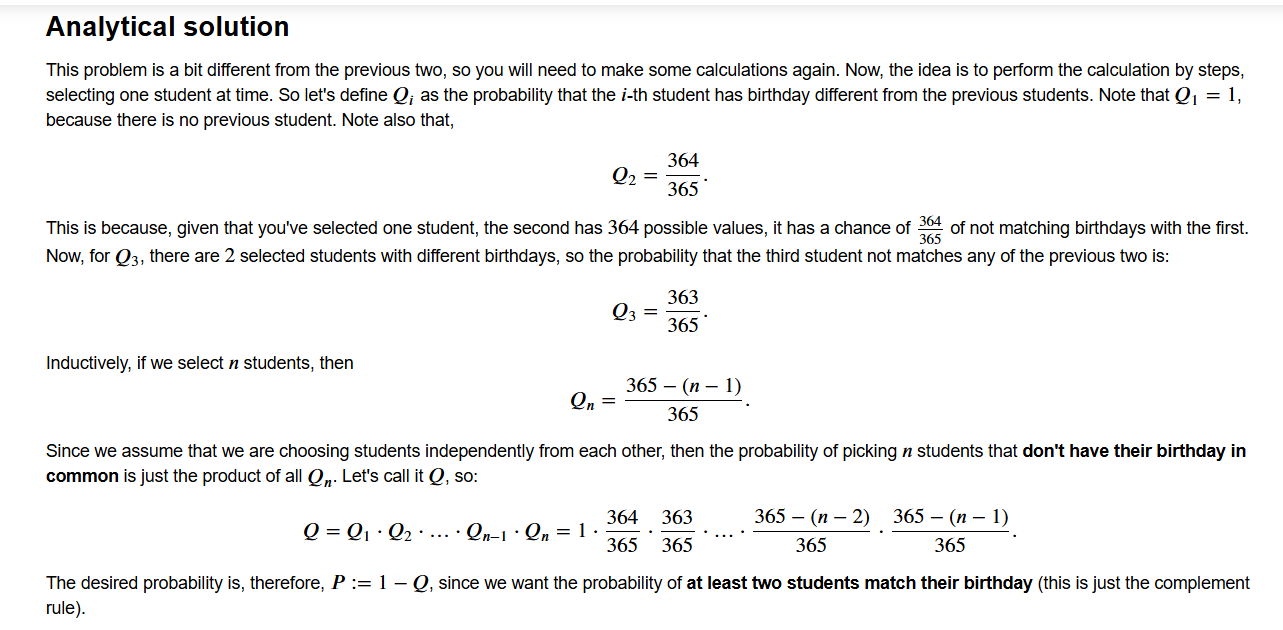

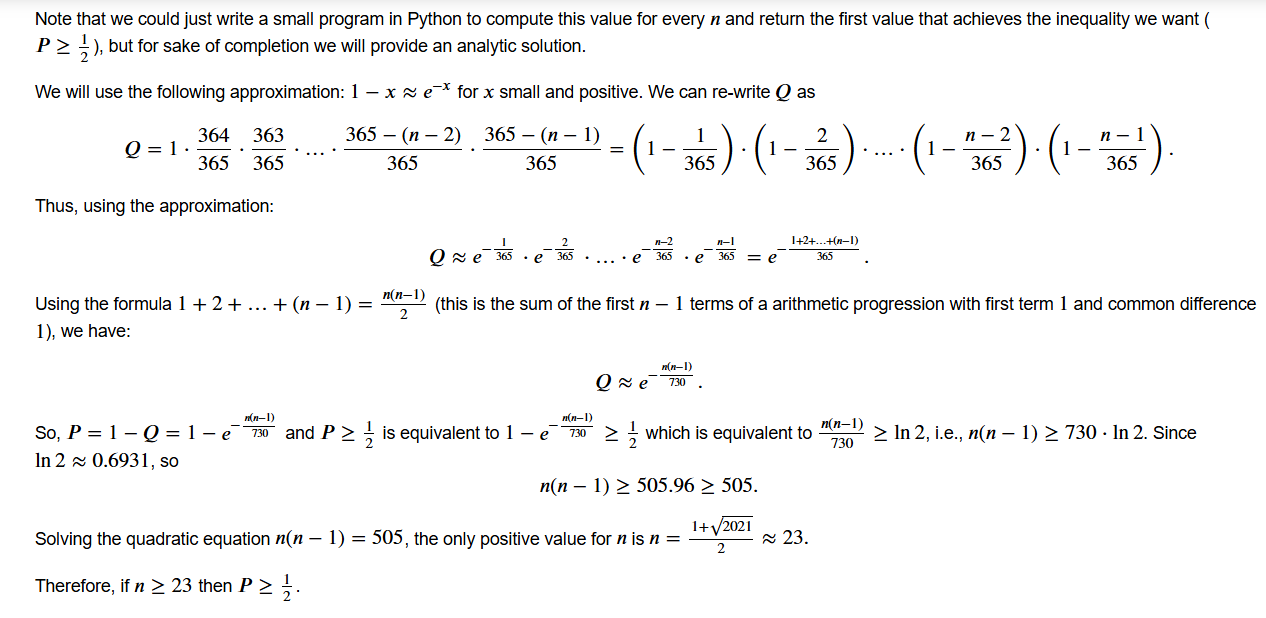

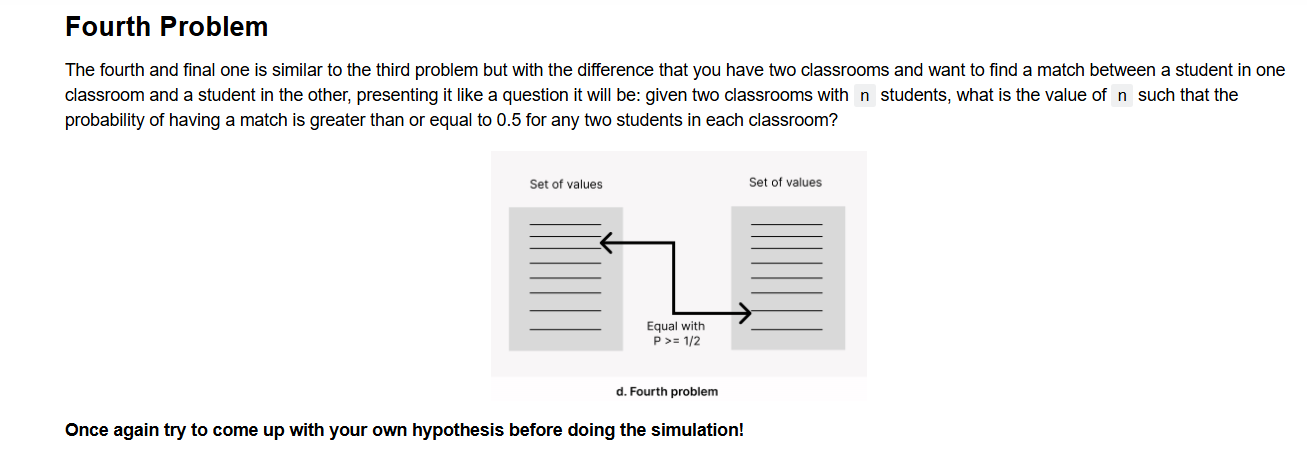

In [ ]:
def problem_4(n_students):

    # Generate birthdays for every student in classroom 1
    gen_bdays_1 = np.random.randint(0, 365, (n_students))

    # Generate birthdays for every student in classroom 2
    gen_bdays_2 = np.random.randint(0, 365, (n_students))

    # Check for any match between both classrooms
    return np.isin(gen_bdays_1, gen_bdays_2).any()

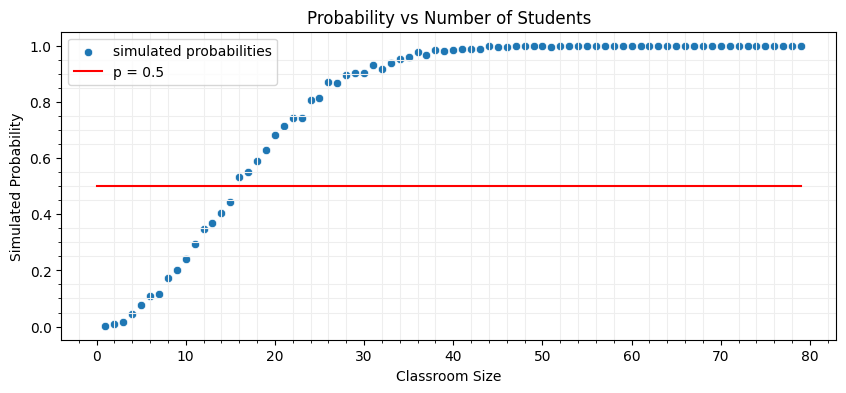

In [ ]:
# Generate the simulated probability for every classroom
simulated_probs_4 = [simulate(problem_4, n_students=n) for n in utils.small_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_4, utils.small_classroom_sizes)

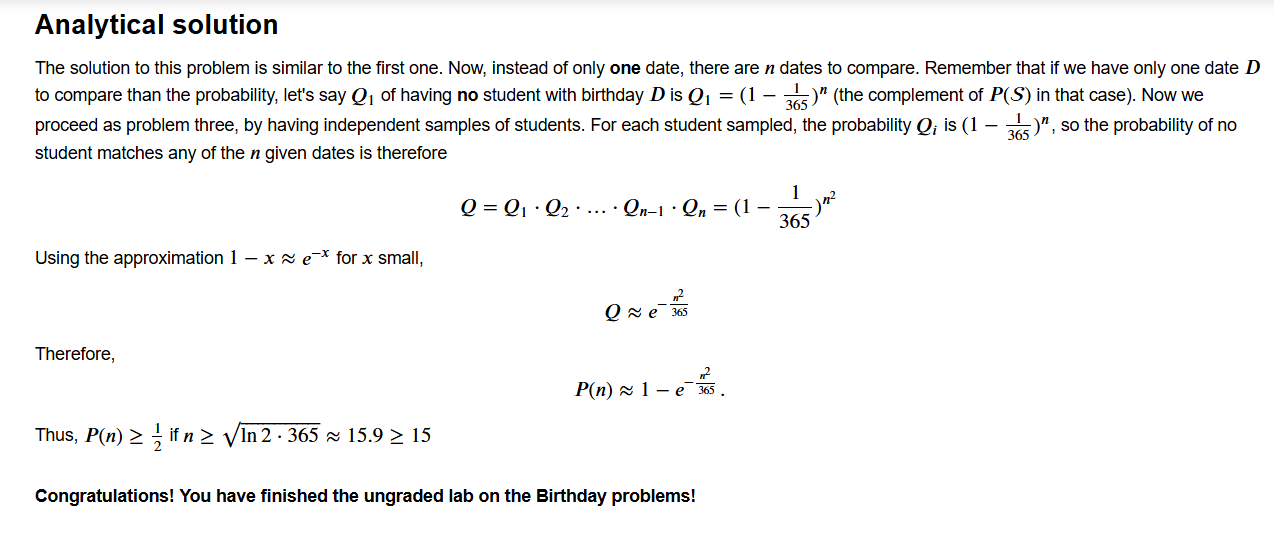